<a href="https://colab.research.google.com/github/LavkushPal/Deep-learning-using-Tensorflow-Keras/blob/main/early_stopping_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [3]:
X,y=make_circles(
    n_samples=1000,shuffle=True,
    noise=0.1,random_state=1
)

In [5]:
X.shape,y.shape

((1000, 2), (1000,))

In [6]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.4,random_state=1,shuffle=True)

In [27]:
model=Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
collback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
  )

In [29]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=collback,verbose=1,epochs=2000)

Epoch 1/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5151 - loss: 0.6908 - val_accuracy: 0.5050 - val_loss: 0.6909
Epoch 2/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5521 - loss: 0.6866 - val_accuracy: 0.4917 - val_loss: 0.6912
Epoch 3/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5351 - loss: 0.6780 - val_accuracy: 0.5233 - val_loss: 0.6889
Epoch 4/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5306 - loss: 0.6780 - val_accuracy: 0.5267 - val_loss: 0.6861
Epoch 5/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5775 - loss: 0.6658 - val_accuracy: 0.5367 - val_loss: 0.6827
Epoch 6/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5294 - loss: 0.6749 - val_accuracy: 0.5633 - val_loss: 0.6775
Epoch 7/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5507 - loss: 0.6722 - val_accuracy: 0.6000 - val_loss: 0.6746
Epoch 8/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6101 - loss: 0.6561 - val_accu

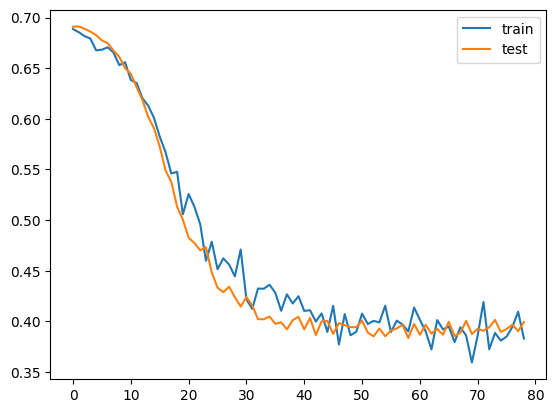

In [30]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()